# Diferenciální rovnice 1

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.integrate import solve_ivp

* Ve cvičení začínáme částí A, řešení modelu dynamické rovnováhy druhů z
  přednášky.
* Kdo je schopen postupovat podle textu a řešit úkoly samostatně, může pracovat
  dopředu a pokračovat částí B, kde jsou na modelu ochlazování kávy možnosti
  příkazu pro řešení diferenciálních rovnic.
* Část C se vrací k modelu dynamické rovnováhy, ukazuje příklad, jak je možné
  nakreslit křivky řídící rychlosti kolonizace a vymírání a jak je možné
  prozkoumat chování modelu při různých počátečních podmínkách a různých
  hodnotách parametru. Zájemci by měli být schopni si tyto pasáže projít sami. 



## Část A: Řešení diferenciální rovnice (modifikace existujícího kódu)

Pokud jste rychlejší, řešte samostatně a pokračujte samostatně k části B s
detailnějším popisem příkazu `solve_ivp`.


### Řešení rovnice a vizualizace řešení. 

Následující kód vyřeší rovnici $$\frac{\mathrm dN}{\mathrm dt}= \frac
b{D(N+\beta)}-a\frac {N^k}S$$ dynamické rovnováhy na ostrově s nulovou počáteční
podmínkou. 


#### Úkoly:

* Vyzkoušejte si. Zkuste i zadání více počátečních podmínek, například 
  řádek `pocatecni_podminka = [0]` vyměňte za `pocatecni_podminka =
  [0,5,10,20]`. Tím získáte řešení pro několik počátečních podmínek současně.
* Vykopírujte text do nové buňky a opravte tak, aby zobrazoval řešení počáteční
  úlohy $$\frac{\mathrm dT}{\mathrm dt}=-0.1(T-20), \quad T(0)=100$$ s
  ochlazováním kávy z minulého cvičení. I zde zkuste více počátečních podmínek.
  

[(0.0, 12.609006758548855),
 Text(0.5, 1.0, 'Dynamická rovnováha počtu druhů na ostrově'),
 Text(0.5, 0, 'čas'),
 Text(0, 0.5, 'počet druhů')]

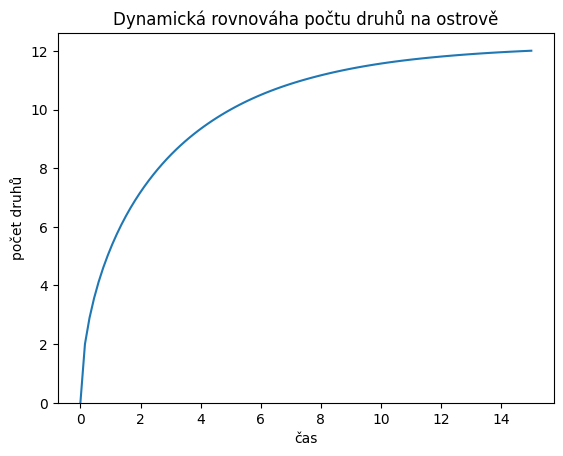

In [4]:
### Příprava funkcí a parametrů
pocatecni_podminka = [0]  # počáteční podmínka nebo podmínky
meze = [0,15]  # interval, na kterém hledáme řešení
n = 100 # počet dělících bodů

def model(t, N, a=1, b=8, beta=0.2, D=0.5, k=1.3, S=20):
    """
    Funkce z pravé strany modelu dynamické rovnováhy počtu druhů na ostrovech, 
    podle McArthura a Wilsona. 
    
    Vstup:
    -----
    Povinnými parametry jsou čas a počet druhů, volitelnými vzdálenost 
    D od pevniny, rozloha ostrova S, další parametry modelu a konstanty 
    úměrnosti. Přednastavené hodnoty jsou pouze ilustrační, závisí na volbě
    jednotek a konkrétním použití.
    
    Výstup:
    ------
    Hodnota funkce.
    """
    kolonizace = b/(D*(N+beta))
    vymirani = a*N**k/S 
    return  kolonizace - vymirani 

### Řešení modelu
t=np.linspace(*meze, n)  # definiční obor, v těchto bodech budeme hledat řešení
reseni = solve_ivp(
                   model,
                   meze,
                   pocatecni_podminka,
                   t_eval=t
                   )

### Vizualizace řešení
fig,ax = plt.subplots(1)
ax.plot(t,reseni.y.T)
ax.set(
    ylim = (0,None),
    title = "Dynamická rovnováha počtu druhů na ostrově",
    xlabel="čas",
    ylabel="počet druhů",
)

### Řešení pro sadu parametrů

Následující kód řeší vícekrát rovnici dynamické rovnováhy pro několik různých
vzdálenosti ostrova od pevniny. 

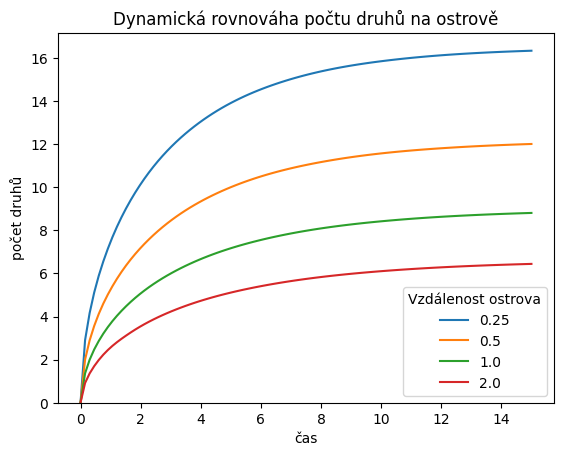

In [5]:
### Příprava funkcí a parametrů
pocatecni_podminka = [0]  # počáteční podmínka
meze = [0,15]  # interval, na kterém hledáme řešení
n = 100 # počet dělících bodů
parametry = [0.25,0.5,1,2] # seznam parametrů


def model(t, N, a=1, b=8, beta=0.2, D=0.5, k=1.3, S=20):
    """
    Funkce z pravé strany modelu dynamické rovnováhy počtu druhů na ostrovech, 
    podle McArthura a Wilsona. 
    
    Vstup:
    -----
    Povinnými parametry jsou čas a počet druhů, volitelnými vzdálenost 
    D od pevniny, rozloha ostrova S, další parametry modelu a konstanty 
    úměrnosti. Přednastavené hodnoty jsou pouze ilustrační, závisí na volbě
    jednotek a konkrétním použití.
    
    Výstup:
    ------
    Hodnota funkce.
    """
    kolonizace = b/(D*(N+beta))
    vymirani = a*N**k/S 
    return  kolonizace - vymirani 

### Řešení modelu
t=np.linspace(*meze, n)  # definiční obor, v těchto bodech budeme hledat řešení
df = pd.DataFrame(index=t, columns=parametry)      # tabulka pro výstup

for parametr in parametry:
    reseni = solve_ivp(
                       lambda t,x:model(t,x,D=parametr),
                       meze,
                       pocatecni_podminka,
                       t_eval=t
                       )
    df[parametr] = reseni.y.T # další sloupec tabulky
    # lambda funkce viz https://www.w3schools.com/python/python_lambda.asp
    # (dočasná nepojmenovaná funkce)

### Vizualizace řešení
ax = df.plot()
ax.set(
    ylim = (0,None),
    title = "Dynamická rovnováha počtu druhů na ostrově",
    xlabel="čas",
    ylabel="počet druhů",
)
plt.legend(title="Vzdálenost ostrova")

#### Úkoly

* Vyzkoušejte si kód.
* V nové buňce sledujte vliv rozlohy ostrova (vzdálenost je stejná) na druhovu
  skladbu. Vykopírujte si kód a proveďte příslušnou modifikaci.
* Před každou buňku s výpočty vložte textovou buňku popisující, co se ve výpočtu
  odehrává, co se snažíme ukázat. Musíte vložit buňku, změnit typ z Code na
  Markdown (vybrat buňku a stisknout M, nebo použít rozbalovací menu v toolbaru nebo menu Cell > Cell type > Markdown) a vepsat komentář.
* Pokud jsou veličiny $S$ a $D$ ve stále stejném poměru, je stejná i hodnota, ke
  které konverguje řešení (viz přednáška). 
  * Znamená to, že se budou populace
  vyvíjet stejně na daném ostrově a na ostrově, který je dvakrát větší a
  dvakrát dále? V čem se bude situace lišit a v čem bude stejná? 
  * Odhadněte
  odpověď a potvrďte si  hypotézu tak, že budete modelovat plnou
  diferenciální rovnici pro obě uvažované situace. Můžete použít něco jako
  `lambda t,x:model(t,x,D=0.5*nasobek,S=20*nasobek)` a proměnnou `nasobek` nechat iterovat přes seznam `[1,2]` (případně delší seznam).

## Část B: Řešení diferenciální rovnice (podrobnější pohled pod kapotu)

Příkaz `solve_ivp` dokáže vyřešit zadanou diferenciální rovnici pro několik počátečních podmínek. Použití je možné vidět na následujícím příkladě. Pro tři počáteční podmínky $y(0)=2$, $y(0)=4$ a $y(0)=8$  řešíme rovnici $$\frac{\mathrm dy}{\mathrm dt}=-0.5 y,$$
kterou je možno chápat jako rovnici ochlazování, nebo jako rovnici radioaktivního rozpadu. Výstupem je objekt, který v sobě obsahuje kromě vypočtených dat i další informace, například zda se podařilo rovnici vyřešit. 

In [6]:
pocatecni_podminky = [2, 4, 8]
meze = [0,10]
def rovnice(t, y): 
    return -0.5 * y
sol = solve_ivp(rovnice, meze, pocatecni_podminky)
sol


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.149e-01  1.264e+00  3.061e+00  4.816e+00
             6.574e+00  8.333e+00  1.000e+01]
        y: [[ 2.000e+00  1.888e+00 ...  3.107e-02  1.351e-02]
            [ 4.000e+00  3.777e+00 ...  6.214e-02  2.702e-02]
            [ 8.000e+00  7.553e+00 ...  1.243e-01  5.403e-02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 44
     njev: 0
      nlu: 0

Následující příkazy vytisknou časy ve kterých bylo vypočteno řešení a hodnotu každého z řešení v daném čase.

In [7]:
print(sol.t)
print(sol.y)

[ 0.          0.11487653  1.26364188  3.06061781  4.81611105  6.57445806
  8.33328988 10.        ]
[[2.         1.88836035 1.06327177 0.43319312 0.18017253 0.07483045
  0.03107158 0.01350781]
 [4.         3.7767207  2.12654355 0.86638624 0.36034507 0.14966091
  0.06214316 0.02701561]
 [8.         7.5534414  4.25308709 1.73277247 0.72069014 0.29932181
  0.12428631 0.05403123]]


Pro pohodnější práci je možné data zadat do tabulky, kde v prvním sloupci bude čas a v dalších sloupcích budou vypočtená řešení. Název sloupce bude dán počáteční podmínkou. Je vidět, že tímto číslem každé řešení i začíná.

In [8]:
df = pd.DataFrame()
df.index = sol.t
for i,j in zip(pocatecni_podminky, sol.y):
    df[i] = j
df

,2,4,8
0.000000,2.000000,4.000000,8.000000
0.114877,1.888360,3.776721,7.553441
1.263642,1.063272,2.126544,4.253087
3.060618,0.433193,0.866386,1.732772
4.816111,0.180173,0.360345,0.720690
6.574458,0.074830,0.149661,0.299322
8.333290,0.031072,0.062143,0.124286
10.000000,0.013508,0.027016,0.054031


Po vykreslení vidíme, že graf je z lomených čar. Pro výraznost jsme přidali i tečky v bodech zlomu. To proto, že řešení byla vypočtena a v několika málo bodech.

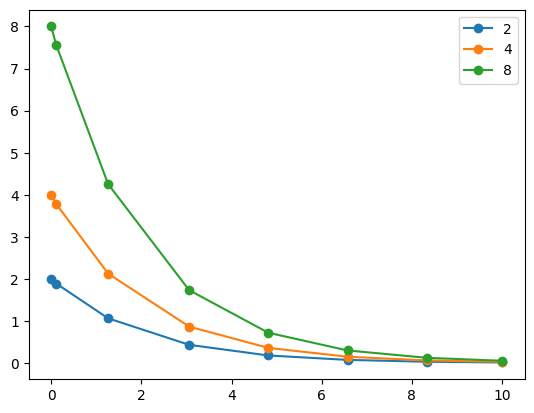

In [9]:
df.plot(style="o-");

### Úkol

Vyzkoušejte si následující elegantnější příkazy. Pomocí nich nemusíme dělat cyklus přes jednotlivá řešení při sestavování tabulky a můžeme nakreslit všechna tři řešení jedním příkazem i bez sestavování tabulky. Snažte se zjistit, co dělá operátor `T`.

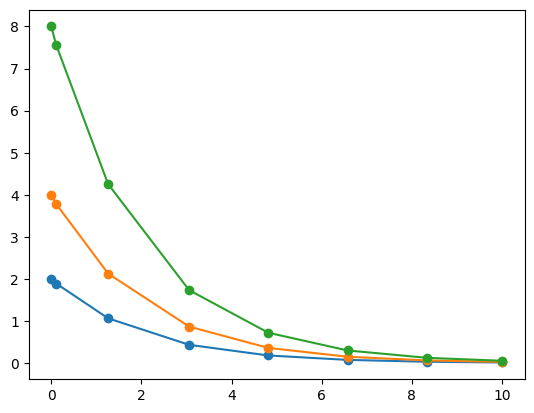

In [10]:
plt.plot(sol.t,sol.y.T,"o-");

In [11]:
df = pd.DataFrame(sol.y.T,columns=pocatecni_podminky)
df.index = sol.t
df

,2,4,8
0.000000,2.000000,4.000000,8.000000
0.114877,1.888360,3.776721,7.553441
1.263642,1.063272,2.126544,4.253087
3.060618,0.433193,0.866386,1.732772
4.816111,0.180173,0.360345,0.720690
6.574458,0.074830,0.149661,0.299322
8.333290,0.031072,0.062143,0.124286
10.000000,0.013508,0.027016,0.054031


In [12]:
pd.DataFrame(sol.y)

,0,1,2,3,4,5,6,7
0,2.0,1.888360,1.063272,0.433193,0.180173,0.074830,0.031072,0.013508
1,4.0,3.776721,2.126544,0.866386,0.360345,0.149661,0.062143,0.027016
2,8.0,7.553441,4.253087,1.732772,0.720690,0.299322,0.124286,0.054031


In [13]:
pd.DataFrame(sol.y.T)

,0,1,2
0,2.000000,4.000000,8.000000
1,1.888360,3.776721,7.553441
2,1.063272,2.126544,4.253087
3,0.433193,0.866386,1.732772
4,0.180173,0.360345,0.720690
5,0.074830,0.149661,0.299322
6,0.031072,0.062143,0.124286
7,0.013508,0.027016,0.054031


### Řešení hladšími křivkami 

Řešení z minulých ukázek se skládalo z lomených čar. Nemělo spojitou derivaci, nebylo hladké. Pro hladší řešení je možné provést jednu nebo více z následujících vylepšení.

* Zvolit menší krok, aby se vygenerovalo více hodnot pro čas $t$, 
* Nastavit proměnnou `t_eval` na dostatečně hustou posloupnost bodů. Toto jsme si vyzkoušeli v úvodní části.
* Nastavit hodnotu `dense_output` na True a řešení poté kreslit na husté množině bodů. Toto si vyzkoušíme níže.

Volba kroku také bývá základním testem korektnosti numerického řešení. Příliš velký krok může způsobit nepřesnosti v řešení, příliš malý krok je náročný na paměť i výpočetní výkon a také může vést k nepřesnostem. Obvyklým testem je porovnat řešení se zvoleným a s polovičním krokem. Pokud se shodují, je rozumné výsledek přijmout jako dobrou aproximaci přesného řešení.

In [14]:
t = np.linspace(*meze,500)
sol = solve_ivp(
    rovnice, 
    meze, 
    pocatecni_podminky,
    t_eval=t,
    max_step=np.Inf, # defaultní nastavení je krok libovolné délky
    )
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.004e-02 ...  9.980e+00  1.000e+01]
        y: [[ 2.000e+00  1.980e+00 ...  1.364e-02  1.351e-02]
            [ 4.000e+00  3.960e+00 ...  2.729e-02  2.702e-02]
            [ 8.000e+00  7.920e+00 ...  5.458e-02  5.403e-02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 44
     njev: 0
      nlu: 0

(500, 3)
                2         4         8
0.00000  2.000000  4.000000  8.000000
0.02004  1.980060  3.960120  7.920240
0.04008  1.960319  3.920638  7.841275
0.06012  1.940774  3.881549  7.763098
0.08016  1.921425  3.842850  7.685699


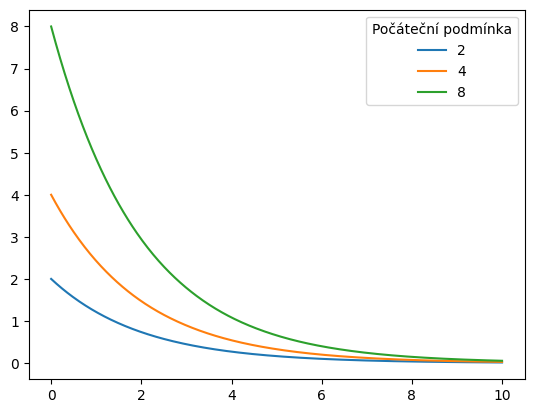

In [16]:
df = pd.DataFrame(sol.y.T,columns=pocatecni_podminky)
df.index = t

print(df.shape)
print(df.head())

ax = df.plot()
ax.legend(title="Počáteční podmínka");

### Řešení rovnice pro různé hodnoty parametru

Někdy potřebujeme řešit rovnici a sledovat, jak se chová řešení při změně parametru. Vyjdeme ze stejné počáteční podmínky a pro nastavené hodnoty parametru najdeme řešení. 

(500, 4)
                0.5         1.0         2.0         3.0
0.00000  100.000000  100.000000  100.000000  100.000000
0.02004   99.002999   98.015939   96.071240   94.165121
0.04008   98.015939   96.071242   92.296834   88.670711
0.06012   97.038719   94.165130   88.670717   83.496898
0.08016   96.071242   92.296836   85.186977   78.622903


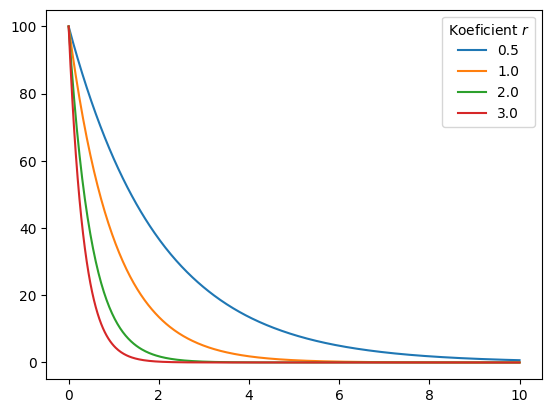

In [24]:
def rovnice_r(t, y, r=1):  
    return -r*y # prava strana rovnice zavisi na parametru r

meze = [0,10]
hodnoty_r = [0.5,1,2,3]
pocatecni_podminka = [100] # Jedna pocatecni podminka

t = np.linspace(*meze,500) # hvezdicka rozbali pole na dve hodnoty pro dolni a horni mez

reseni = [solve_ivp(
                    rovnice_r, 
                    meze, 
                    pocatecni_podminka,
                    t_eval=t,
                    args=[r]
                    ).y[0]
            for r in hodnoty_r]
        # vygenerovani reseni pro ruzne hodnoty parametru r    |
df = pd.DataFrame(
                    np.array([res for res in reseni]).T,
                    columns=hodnoty_r
                )
df.index = t

### Jiná alternativa uložení dat do tabulky. Ukládáme postupně sloupce 
### i s jejich názvy do tabulky v cyklu for.
# df = pd.DataFrame() # tabulka pro uložení řešení
# df.index = t         # sloupec s časem
# for i,j in zip(hodnoty_r, reseni):
#     df[i] = j.sol(t)[0]  # sloupce s řešeními, v záhlaví hodnota parametru


print(df.shape) # tisk informaci o tabulce a graf
print(df.head())

ax = df.plot()

ax.legend(title=r"Koeficient $r$");

Někdy se může hodit si funkci definující pravou stranu nepojmenovávat a nepředávat jí parametry. Například, pokud je její použití jednorázové. Potom je možno použít metodiku práce s [nepojmenovanými funkcemi](https://www.w3schools.com/python/python_lambda.asp), takzvané `lambda` funkce. Ta umožňuje zadat pravou stranu rovnice přímo v příkazu `solve_ivp`.

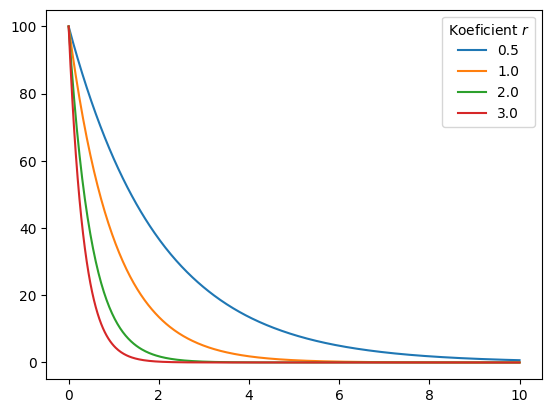

In [27]:
hodnoty_r = [0.5,1,2,3]
pocatecni_podminka = [100] # Jedna pocatecni podminka

reseni = [solve_ivp(
                    lambda t,y: -r*y, 
                    meze, 
                    pocatecni_podminka,
                    t_eval=t
                    ).y[0]
            for r in hodnoty_r]
        # vygenerovani reseni pro ruzne hodnoty parametru r    

t = np.linspace(*meze,500) # hvezdicka rozbali pole na dve hodnoty pro dolni a horni mez
df = pd.DataFrame(np.array(reseni).T, columns=hodnoty_r, index=t)

ax = df.plot()
ax.legend(title=r"Koeficient $r$");

## Část C: Model rovnováhy počtu druhů na ostrovech

V této části již nebude nic nového, ale je to ukázka, jak získané znalosti
využít při studiu modelů.

Budeme studovat Mc Arthurův a Wilsonův model vývoje ostrovního společenství ve tvaru
$$
  \frac{\mathrm dN}{\mathrm dt}= \frac b{D(N+\beta)}-a\frac {N^k}S,
$$
kde $N$ je počet druhů na ostrově o velikosti $S$ ve vzdálenosti $D$ od pevniny. Všechny parametry $a$, $b$, $\beta$ a $k$ jsou kladné, parametr $k$ splňuje $k>1$.

První člen na pravé straně charakterizuje rychlost kolonizace, druhý člen
rychlost vymírání. 

* Nakreslíme si křivky kolonizace a vymírání. 
  * Nejprve překreslíme obrázek, který se často vyskytuje v publikacích k
    problematice. Dvě křivky vymírání pro dvě rozlohy ostrova, dvě křivky
    kolonizace pro dvě vzdálenosti ostrova od pevniny. Z jejich průsečíků je
    možné odhalit, při jakém počtu druhů nastane dynamická rovnováha.
  * V předchozím obrázku je příliš informací, což je někdy na škodu. Ve druhém
    obrázku necháme jenom jednu z křivek kolonizace, ať je lépe možné sledovat
    rovnovážnou polohu v závislosti na rozloze ostrova. 
  * Dále vyřešíme model pro různé počáteční podmínky. Není překvapení, že vždy
    se nastolí rovnováha. 
  * Nakonec vyřešíme model pro různé hodnoty parametru. 

### Grafy rychlostí kolonizace a vymírání

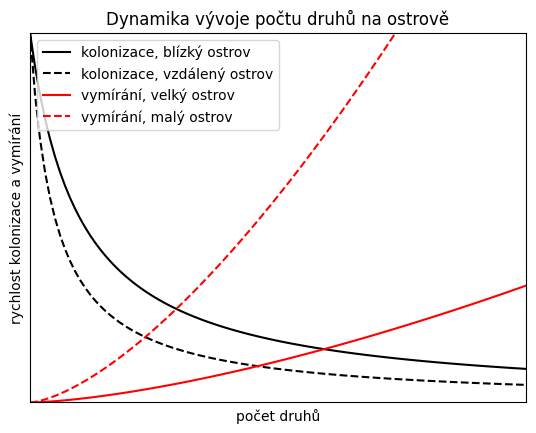

In [28]:
def kolonizace(N,b=1,beta=1,D=1):
    return b/(D*(N+beta))

def vymirani (N, S=1, a=1, k=1.4):
    return a*N**(k)/S

N = np.linspace(0,10,100)
plt.plot(N,kolonizace(N,b=10, D=1),"k-",label="kolonizace, blízký ostrov")
plt.plot(N,kolonizace(N,b=10, D=2, beta=.5),"k--",label="kolonizace, vzdálený ostrov")

plt.plot(N,vymirani(N, k=1.5, S = 10),"r-",label=r"vymírání, velký ostrov")
plt.plot(N,vymirani(N, k=1.5, S = 2),"r--",label=r"vymírání, malý ostrov")
plt.legend()
ax = plt.gca()
ax.set(
    ylim=(0,10), 
    xlim=(0,10),
    title="Dynamika vývoje počtu druhů na ostrově",
    xlabel="počet druhů",
    ylabel="rychlost kolonizace a vymírání",
    xticks=[],
    yticks=[]
    );
    

Zkusíme zafixovat rychlost kolonizace a sledovat vymírání jako funkci obsahu ostrova. Měli bychom vidět, že pro menší ostrov je větší rychlost vymírání. Rovnovážný počet druhů najdeme jako průsečík křivky vymírání s čárkovanou křivkou kolonizace. Měli bychom vidět, že první souřadnice průsečíku je pro menší ostrov menší.

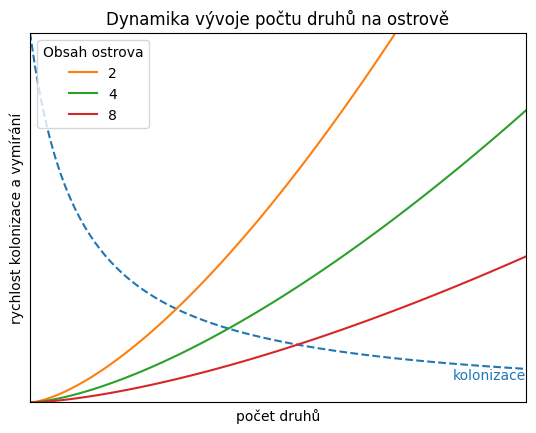

In [29]:
def kolonizace(N,b=10,beta=1,D=1):
    return b/(D*(N+beta))
def vymirani (N, S=1, a=1, k=1.4):
    return a*N**(k)/S
meze = [0,10]
obsahy = [2,4,8]

N = np.linspace(*meze,100)
df = pd.DataFrame()
df["N"] = N    
for S in obsahy:
    df[S] = vymirani(N, k=1.5, S = S)

fig,ax = plt.subplots(1)
ax.plot(N,kolonizace(N),"--",label="_nolegend_") 
df.plot(x="N", ax=ax)   

ax.legend(title="Obsah ostrova", loc="upper left")
ax.text(N[-1], kolonizace(N[-1]), "kolonizace", color="C0", ha="right", va="top")
ax.set(
    ylim=(0,10), 
    xlim=meze,
    title="Dynamika vývoje počtu druhů na ostrově",
    xlabel="počet druhů",
    ylabel="rychlost kolonizace a vymírání",
    xticks=[],
    yticks=[]
    );


### Řešení diferenciální rovnice 

Nyní budeme diferenciální rovnici řešit. Použijeme bezrozměrný tvar $$ \frac{\mathrm dn}{\mathrm d\tau}=\frac{1}{n+1}-\alpha n^k,$$ kde $\alpha = \frac{a\beta ^k}{S}\frac{\beta D}{b}$, $n=\frac N\beta$ a $\tau = \frac{b}{\beta D} \frac t\beta$. Tedy parametr $\alpha$ je nepřímo úměrný obsahu ostrova a přímo úměrný vzdálenosti od ostrova, velikost populace měříme v násobcích parametru $\beta$ a rychlost plynutí času se mění se vzdáleností od ostrova.


### Závislost na počáteční podmínce

Využijeme toho, že je možné zadat celou sadu počátečních podmínek a že nemusíme
řešit rovnici pro každou počáteční podmínku samostatně. Kromě toho zafixujeme
barvu kreslení na první barvu v sadě (`C0`), protože nemá smysl jednotlivá
řešení odlišovat barevně. Protože křivek je hodně, změníme tloušťku čáry.

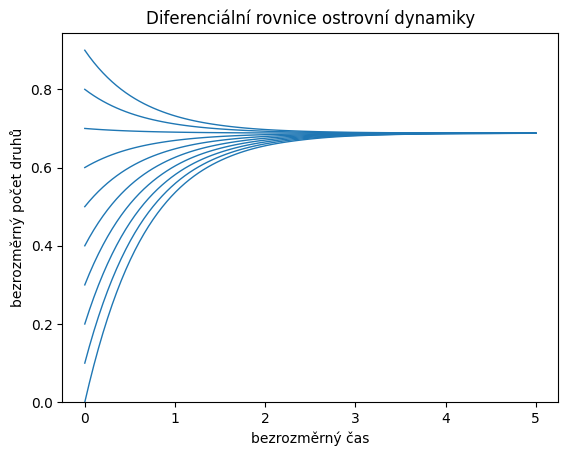

In [30]:
pocatecni_podminka = np.arange(0,1,0.1)
meze = [0,5]
def rovnice(t, n, alpha=1, k=1.4):
    return 1/(n+1) - alpha*n**k

t = np.linspace(*meze, 100)  # definicni obor pro reseni
reseni = solve_ivp(rovnice, meze, pocatecni_podminka, t_eval=t)

fig,ax = plt.subplots(1)
ax.plot(t,reseni.y.T,color="C0",lw=1)
ax.set(
    ylim=(0,None),
    title="Diferenciální rovnice ostrovní dynamiky",
    xlabel="bezrozměrný čas",
    ylabel="bezrozměrný počet druhů",
);

### Závislost na parametru $\alpha$

In [ ]:
pocatecni_podminka = [0]
meze = [0,5]
alphas = [2,4,6,8]
k = 1.4

t = np.linspace(*meze, 100) # časy ve kterých určíme hodnotu řešení
def rovnice(t, n, alpha=1, k=1.4):
    return 1/(n+1) - alpha*n**k
# Trochu jiná taktika určení řešení. Budeme ukládat rovnou hodnoty 
# řešení v uvedených bodech, tj. za příkazem pro 
# řešení použijeme .y[0]    
reseni = [
            solve_ivp(rovnice, 
                      meze, 
                      pocatecni_podminka, 
                      args=(alpha,k),
                      t_eval=t,
                     ).y[0]
            for alpha in alphas
         ]
df = pd.DataFrame(np.array(reseni).T, columns=alphas)
df.index = t
ax = df.plot(
    title="Diferenciální rovnice ostrovní dynamiky",
    xlabel="bezrozměrný čas",
    ylabel="bezrozměrný počet druhů",
)
ax.legend(title=r"Parametr $\alpha$");